In [2]:
import librosa
import numpy as np
from IPython.display import Audio
import librosa.display
import matplotlib.pyplot as plt

### Plays and plots the complex number based GAN output

[-0.02110671  0.00274352]


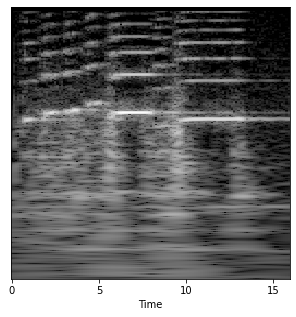

In [5]:
sample = np.load("data.npy")[0]
print(sample[0][0])
des = np.zeros([256, 128], dtype=np.complex64)

for i in range(len(sample)):
    for k in range(len(sample[0])):
        des[i][k] = complex(sample[i][k][0], sample[i][k][1])

res = librosa.istft(des)

# convert the slices to amplitude
sgram_db = librosa.amplitude_to_db(abs(des))

_, ax = plt.subplots(figsize=(5, 5))

librosa.display.specshow(sgram_db, sr=4096, x_axis='time',  ax=ax, cmap='gray')


# We'll need IPython.display's Audio widget
from IPython.display import Audio

Audio(data=res, rate=22050)


In [ ]:
 sample = np.load("")
            
# Save the numpy array
np.save(f"output-arrays/epoch_{epoch+1}_sample_{i}.npy", sample)
            
# Save a spectrogram
des = np.zeros([256, 128], dtype=np.complex64)

for i in range(len(sample)):
    for k in range(len(sample[0])):
        des[i][k] = complex(sample[i][k][0], sample[i][k][1])

        res = librosa.icqt(des, sr=22050, bins_per_octave=36)

        _, ax = plt.subplots(figsize=(5, 5))
        fig, ax = plt.subplots()
        img = librosa.display.specshow(librosa.amplitude_to_db(abs(res), x_axis='time', y_axis='cqt_note', ax=ax)
        ax.set_title('Constant-Q power spectrum')
        fig.colorbar(img, ax=ax, format="%+2.0f dB")
        plt.savefig(f"output-specs/epoch_{epoch+1}_sample_{i}.png")
        plt.close()

### Plays and plots the magnitude cqt GAN output

C:\Users\Tyler\AppData\Local\Temp\ipykernel_17188\1676502930.py:5: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  img = librosa.display.specshow(librosa.amplitude_to_db(sample), x_axis='time', y_axis='cqt_note', ax=ax)


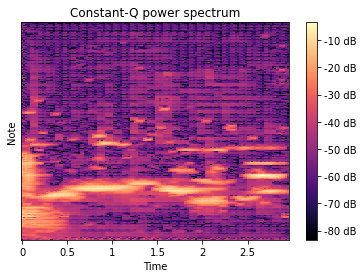

In [3]:
sample = np.load("output-arrays/epoch_70_sample_1.npy")


fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(sample), x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

# Invert using Griffin-Lim
y_inv = librosa.griffinlim_cqt(sample, n_iter=32, bins_per_octave=36)

Audio(data=y_inv, rate = 22050)